# BIOS 512 Final Project

Ellie Balakrishnan


In [1]:
library('tidyverse')
library('ggplot2')
library('forcats')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
chocolate = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv', col_types = cols())

chocolate |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


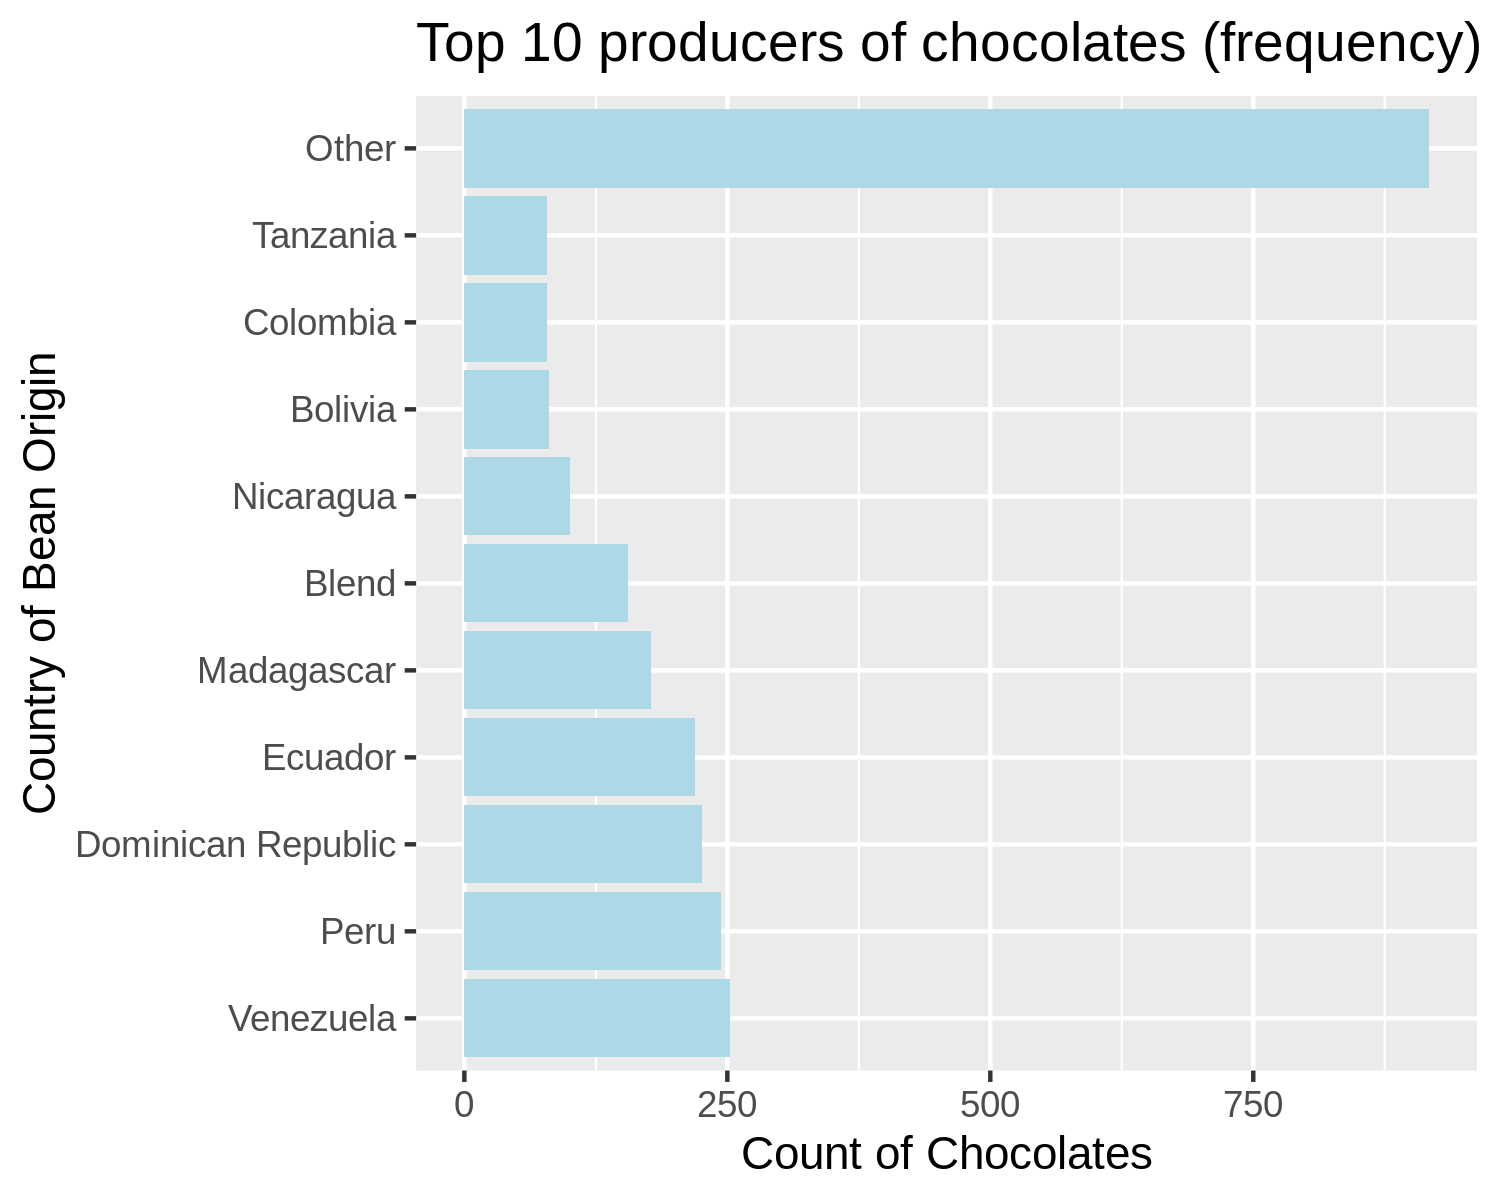

In [59]:
chocolate_country= chocolate |> mutate (country_sorted=country_of_bean_origin %>% fct_infreq() %>% fct_lump(n=10))

p=ggplot(chocolate_country, aes(y=country_sorted)) + geom_bar(fill="lightblue") + 
labs(x="Count of Chocolates", y="Country of Bean Origin", title="Top 10 producers of chocolates (frequency)") + theme_grey()

p

This graph exhibits the top ten countries that provide cocao beans to produce chocolate in the world. Venezuela leads the way and Tanzania comes in tenth. However, the other bar represents the accumulation of all other countries and their production of cacao beans, so it is clear that there are numerous other countries involved in the industry. Below I charted the leading ten countries with the most chocolate ratings of 4. Venezuela is again leading the pack, with Peru coming in close second. There's a clear jump between these countries and the rest in the top ten.

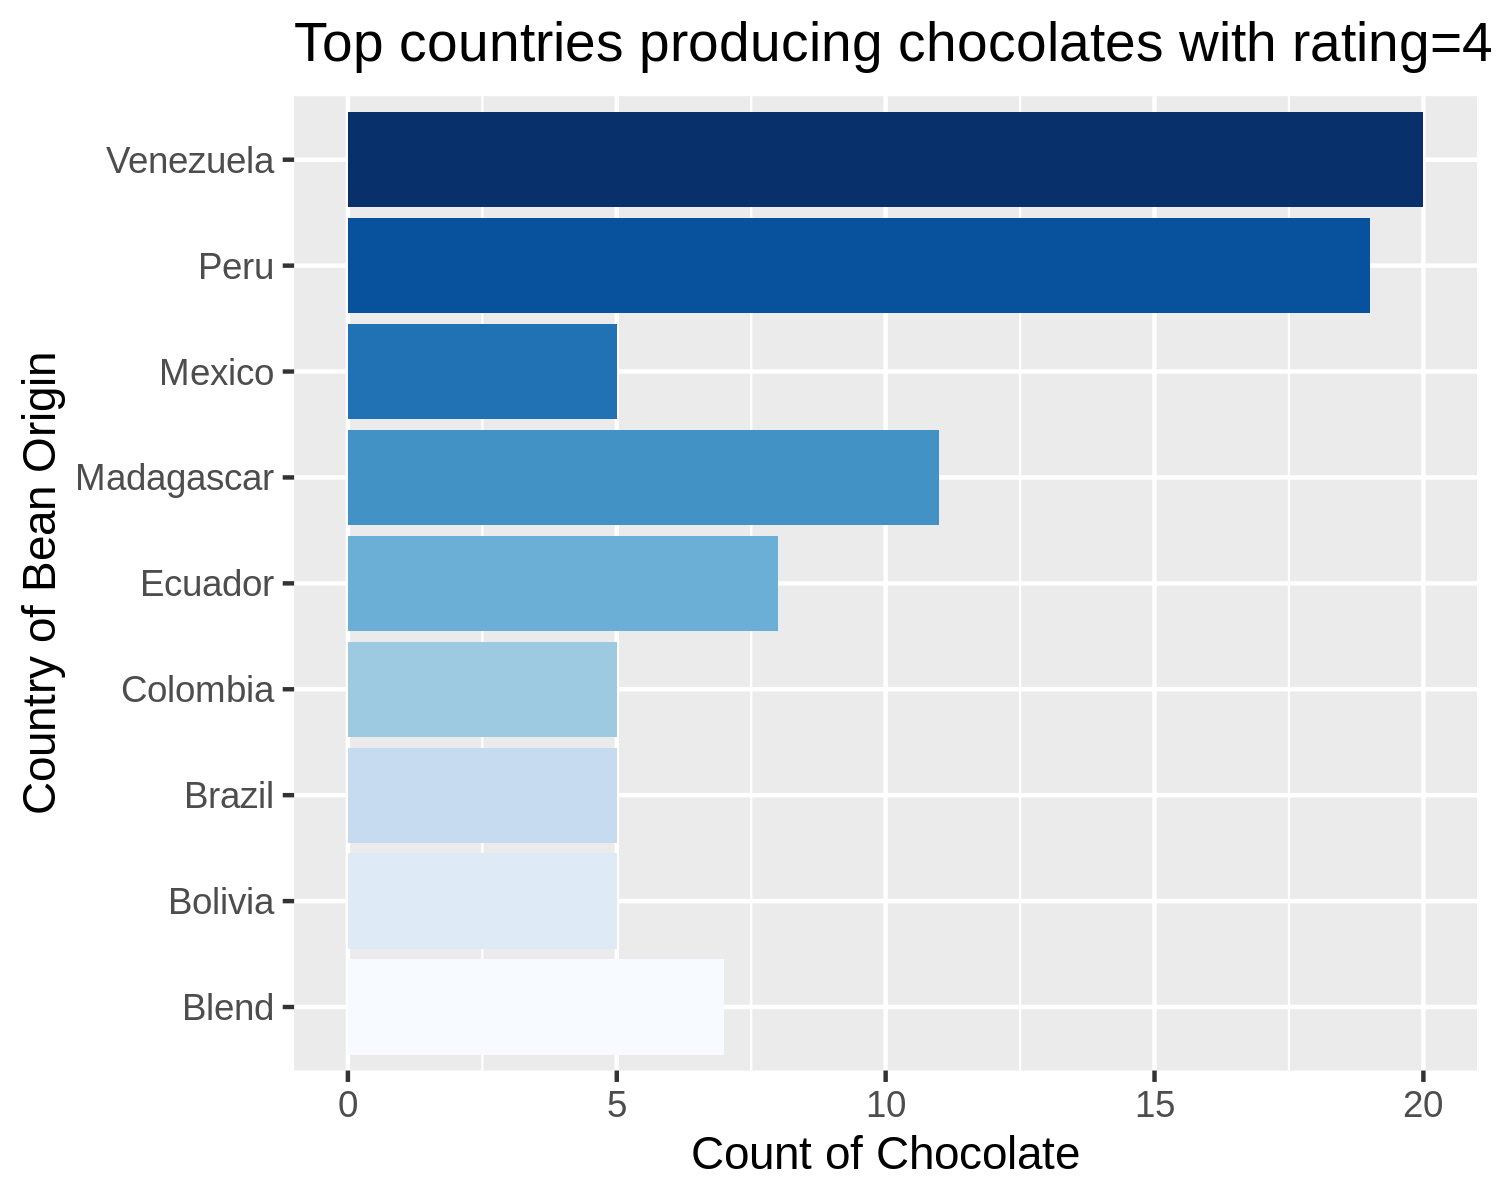

In [61]:
best_chocolate = chocolate %>% filter(rating==4) %>% filter(country_of_bean_origin %in% c("Venezuela", "Peru", "Madagascar", "Ecuador", "Bolivia", "Brazil", "Colombia", "Mexico", "Blend"))

p2=ggplot(best_chocolate, aes(x=country_of_bean_origin, fill=country_of_bean_origin)) + geom_bar(show.legend=FALSE) + coord_flip() + 
labs(y="Count", x="Country of Bean Origin", title="Top countries producing chocolates with rating=4") + theme_grey() + scale_fill_brewer(palette="Blues")

p2

In [ ]:
chocolate_company = chocolate |> group_by(company_location) |> summarize(average_rating=mean(rating)) |> arrange(desc(average_rating)) |> filter(company_location %in% c("Chile", "U.A.E", "Poland", "Vietnam", "Australia", "Guatemala", "Denmark", "Norway", "Switzerland", "Amsterdam", "Iceland")) 
chocolate_company

company_location,average_rating
<chr>,<dbl>
Chile,3.750000
Poland,3.375000
Vietnam,3.359375
Australia,3.358491
Guatemala,3.350000
Denmark,3.338710
Norway,3.333333
Switzerland,3.318182
Amsterdam,3.312500


The table above groups chocolates by company location and summarizes each of those countries with their average chocolate rating. It is interesting to see the difference between where the cacao beans are grown and where the companies producing the chocolate are located. None of the countries in this table are present in either of the other charts. This makes sense because most of those countries that serve as extraction sites for cacao beans do not have the capacity to manufacture the chocolate on their own. However, it would be interesting to investigate how much the cacao industry contributes to each country's economy or if it has been historically more hurtful.